## Homework 4 : Charts

#### Due Date: Saturday October 7 at 11:59PM ET

In this assignment, we will study charts. We will focus on generating histograms. Along the way, we will learn about rug-plots and density estimates. 

The questions guide you step-by-step through these approaches. Please do NOT post questions to Slack. 

#### Collaboration Policy

You are prohibited from sharing your solutions. You are discouraged from providing guidance or assistance on questions. You should refrain from discussing the assignment with others. Consult the syllabus for information about policies surrounding misconduct.


**Name:** *list name here*

**NetId:** *list netid here*

### Rubric

Question | Points
--- | ---
Question 0 | 1
Question 1.1 | 1
Question 1.2 | 1
Question 1.3 | 1
Question 1.4 | 1
Question 2.1 | 1
Question 2.2 | 1
Question 2.3 | 1
Question 3.1 | 1
Question 3.2 | 1
Total | 10

Here we will study data from the World Bank. The World Bank is an international financial organization that provides loans to governments of developing countries. 

<img src="table.PNG"  width="250"/>

The data contains information for 147 countries about 

- literacy rate among adult females 
- gross national income per capita

Note that literacy rate is a percentage of females who are fifteen years or older. Note that income is a ratio of US dollars per person adjusted for conversion and inflation. 

### 0. Load Packages

We will be working with the `numpy` package for manipulations of arrays and the `matplotlib` package for generating charts. Along the way, we will use the `seaborn` package which extends the `matplotlib` package through features aimed at data analysis. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from helper_functions import widget

In [2]:
# TEST 

import sys

assert "numpy" in sys.modules and "np" in locals()
assert "matplotlib" in sys.modules and "plt" in locals()
assert "seaborn" in sys.modules and "sns" in locals()
assert "helper_functions" in sys.modules and "widget" in locals()

Import the function `load_data` from the module `helper_functions` to load the data into a variable called `world_bank_table`. Note that the input is the string `"world_bank.csv"`.

In [3]:
from helper_functions import load_data 

world_bank = load_data("world_bank.csv")

In [4]:
# TEST 

assert world_bank.shape == (147,2)

### 1. Generate Histograms

Remember that the zeroth column of `world_bank` corresponds to literacy rate and the first column corresponds to income.

#### Question 1.1 

We want to define a variable called `barchart_data` containing the entries in the first column of `world_bank` as integer numbers. 

1. Select all of the entries from `world_bank` in the first column. Call the variable `barchart_data`
1. Convert the `dtype` to `int`

In [5]:
barchart_data = world_bank[:,1].astype(int)

In [6]:
# TEST 

assert barchart_data.shape == (147,)
assert barchart_data.dtype == 'int'


Remember the `numpy` function `bincount` from Lab 2. The function counts the number of occurrences of the values in the array.

In [7]:
barchart_data_counts = np.bincount(barchart_data)

Note that `barchart_data_counts` contains 75661 entries ranging from 0 up to 75660 -- the maximum income in the table. 

In [8]:
np.nonzero(barchart_data_counts)

(array([  280,   320,   370,   400,   420,   440,   480,   490,   540,
          580,   620,   640,   660,   700,   720,   730,   750,   760,
          780,   820,   900,   940,   950,  1040,  1100,  1110,  1120,
         1140,  1190,  1200,  1210,  1300,  1330,  1380,  1510,  1520,
         1680,  1710,  1730,  2050,  2120,  2140,  2150,  2160,  2180,
         2220,  2310,  2450,  2510,  2830,  2850,  2970,  3070,  3170,
         3230,  3400,  3440,  3460,  3550,  3580,  3690,  3760,  3780,
         3790,  3810,  3920,  4020,  4070,  4100,  4250,  4270,  4450,
         4620,  4660,  4760,  4880,  4980,  5280,  5430,  5480,  5600,
         5640,  5820,  5950,  6320,  6390,  6530,  6550,  6610,  6670,
         6970,  7070,  7210,  7430,  7470,  7680,  8260,  8710,  8840,
         9040,  9470,  9720,  9760,  9850, 10840, 11180, 11960, 12110,
        12140, 12450, 12570, 12680, 13400, 13530, 14630, 14770, 15230,
        15410, 15680, 17750, 18080, 18960, 19850, 21660, 21750, 22750,
      

We learn from the `numpy` function `nonzero` that many of the entries of `barchart_data_counts` are non-zero. Indeed, a bar-chart of the data would contain 137 bars. So we should use a histogram to group the numbers into ranges.

#### Question 1.2

We can create a histogram with the `matplotlib` function `hist`. We specify `barchart_data` for the data along with 0.95 for `rwidth` to add some space between groups. 

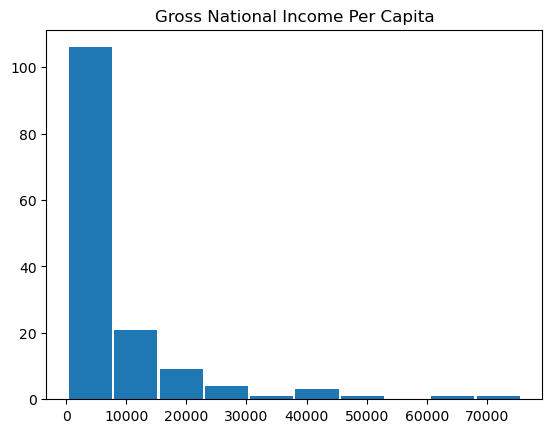

In [9]:
histogram_information = plt.hist(barchart_data, rwidth = 0.95)
plt.title("Gross National Income Per Capita");

We can adjust the number of groups and the range of values for each group. Since we did not specify any information about the groups, we have the defaults from the `matplotlib` package. 

In [10]:
histogram_information[1]

array([  280.,  7818., 15356., 22894., 30432., 37970., 45508., 53046.,
       60584., 68122., 75660.])

In [17]:
histogram_information

(array([9.56604451e-05, 1.89515976e-05, 8.12211327e-06, 3.60982812e-06,
        9.02457030e-07, 2.70737109e-06, 9.02457030e-07, 0.00000000e+00,
        9.02457030e-07, 9.02457030e-07]),
 array([  280.,  7818., 15356., 22894., 30432., 37970., 45508., 53046.,
        60584., 68122., 75660.]),
 <BarContainer object of 10 artists>)

Here, the ranges have the same size of 7538. For example, the second highest bar corresponds to the range of incomes

> (7818, 15356]

meaning greater than or equal to 7818 but less than 15356. How many countries have income in this range? Here the height of the bars in the histogram indicate the count of entries in each group. 

In [11]:
q12 = 21

In [12]:
# TEST 

assert 15 < q12 < 25


#### Question 1.3

We can normalize the histogram with the argument `dentisty` of the function `hist`. 

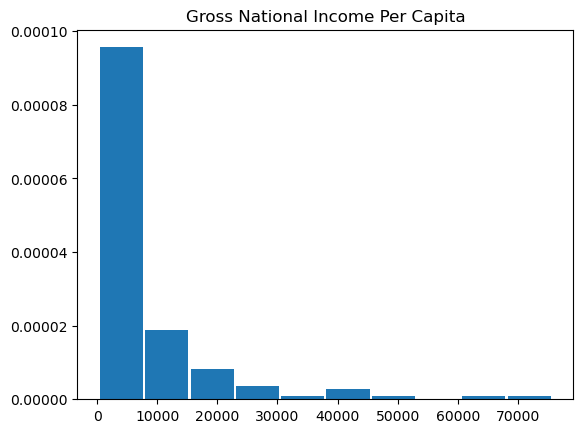

In [13]:
histogram_information = plt.hist(barchart_data, rwidth = 0.95, density = True)
plt.title("Gross National Income Per Capita");

Here the area of the bars in the histogram indicate the proportion of entries in the group. The ranges have the same size of 7538. For example, the second highest bar corresponds to the range of incomes

> (7818, 15356]

Approximately, what fraction of countries have income in this range? Ensure that your answer to Question 1.3 is consistent with your answer to Question 1.2.

In [16]:
histogram_information

(array([9.56604451e-05, 1.89515976e-05, 8.12211327e-06, 3.60982812e-06,
        9.02457030e-07, 2.70737109e-06, 9.02457030e-07, 0.00000000e+00,
        9.02457030e-07, 9.02457030e-07]),
 array([  280.,  7818., 15356., 22894., 30432., 37970., 45508., 53046.,
        60584., 68122., 75660.]),
 <BarContainer object of 10 artists>)

In [2]:
q1_3 = 0.00001895*7538
q1_3

0.1428451

In [67]:
# TEST 

assert 0.1 < q1_3 < 0.2


#### Question 1.4

Note that the data is skewed by large outliers. We can transform the data to a smaller range with the logarithm function. 

In [68]:
np.log10(10**5)

5.0

Note that the logarithm of a number $x$ is the exponent $y$ in $10^y$ such that $$x = 10^y \ .$$ So the logarithm function transforms large numbers to small numbers. 

Apply the `numpy` function `log10` to the entries of `barchart_data`. Call the variable `barchart_data_log`

In [69]:
barchart_data_log = np.log10(barchart_data)

In [70]:
# TEST 

assert barchart_data_log.shape == (147,)


Now the histogram looks less skewed.

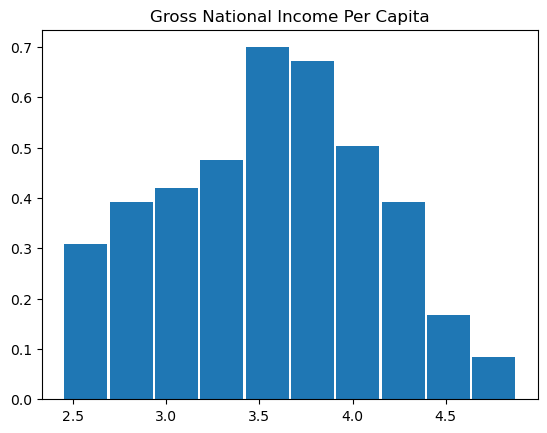

In [71]:
histogram_information = plt.hist(barchart_data_log, rwidth = 0.95, density = True)
plt.title("Gross National Income Per Capita");

### 2. Modify Histograms

The `seaborn` package provides helpful extensions of `matplotlib`. Note that a common alias of `seaborn` is `sns`.

#### Question 2.1 

We want to define a variable called `histogram_data` containing the entries in the zeroth column of `world_bank` as integer numbers. 

1. Select all of the entries from `world_bank` in the zeroth column. Call the variable `histogram_data`
1. Convert the `dtype` to `int`.

In [72]:
histogram_data = world_bank[:,0].astype(int)

In [73]:
# TEST 

assert histogram_data.shape == (147,)
assert histogram_data.dtype == 'int'


Now we can generate a histogram with the `seaborn` function `distplot`.

/opt/conda/envs/mg-gy-8413/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


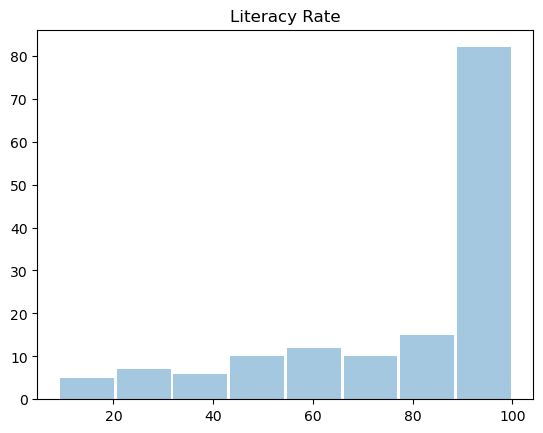

In [74]:
sns.distplot(histogram_data, rug = False, kde=False, hist_kws={"rwidth":0.95})
plt.title('Literacy Rate');

Note that we can add some space between groups with the argument `rwidth`. Let us explore the arguments `rug` and `kde`.

#### Question 2.2

A rug plot allows us to chart one dimensional numerical data. We place a vertical line above each number in the dataset.


/opt/conda/envs/mg-gy-8413/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


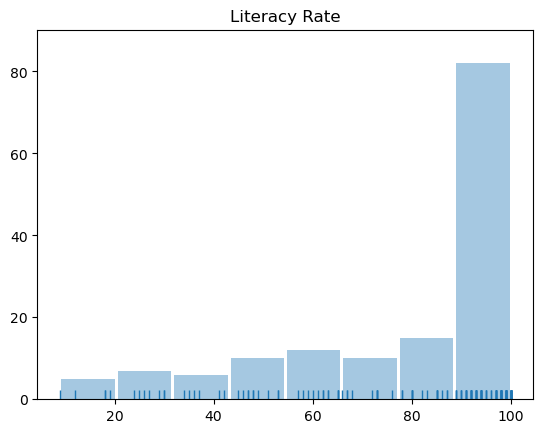

In [75]:
sns.distplot(histogram_data, rug = True, kde=False, hist_kws={"rwidth":0.95})
plt.title('Literacy Rate');

Note that we may have fewer than 147 vetical lines in the rug plot. If we have duplicate values then the vertical lines will overlap. 

Use the `numpy` function `unique` to determine the number of vertical lines in the rug plot.

In [76]:
q1_4 = 56

In [77]:
# TEST 

assert 50 < q1_4 < 100


#### Question 2.3

Note that the data is skewed by small outliers. We can transform the data to a smaller range by taking powers.

In [78]:
np.power(10, 5)

100000

We want to transform a number $x$ to a number $x^y$ for some integer number $y$. Here we will tak $y=4$.

Apply the `numpy` function `power` to the entries of `histogram_data`. Call the variable `histogram_data_power`.

In [79]:
histogram_data_power = np.power(histogram_data,4)

In [80]:
# TEST 

assert histogram_data_power.shape == (147,)


Now the histogram looks less skewed.

/opt/conda/envs/mg-gy-8413/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/mg-gy-8413/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


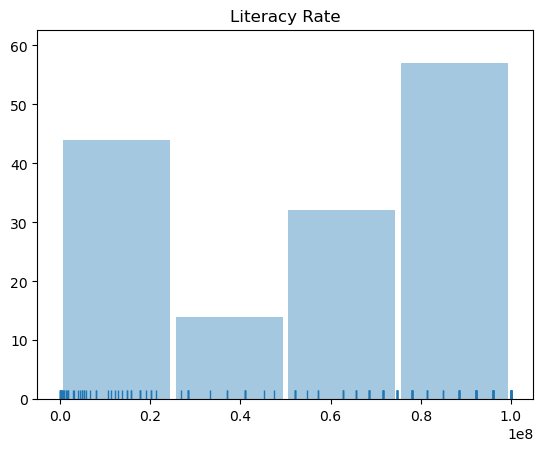

In [81]:
sns.distplot(histogram_data_power, rug = True, kde=False, hist_kws={"rwidth":0.95})
plt.title('Literacy Rate');

### Question 3 Approximate Histograms

The argument `kde` in the `seaborn` function `distplot` allow us to approximate the shape of the histogram. 

/opt/conda/envs/mg-gy-8413/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


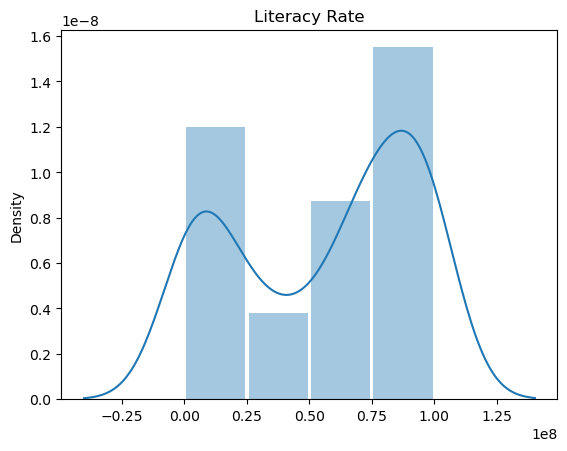

In [82]:
sns.distplot(histogram_data_power, norm_hist=True, rug = False, kde=True, hist_kws={"rwidth":0.95})
plt.title('Literacy Rate');

Here we use the argument `norm_hist` to generate a normalized histogram.

Note that the curves extend outside of the range 0 to 100. We cannot make sense of these values as percentage. However, the curves extrapolates on the trends in the range 0 to 100.

#### Question 3.1 

Note that `kde` is an acronymn for kernel density estimate. A kernel density estimate allows us to approximate a histogram through a combination of curves. Commonly we take the curves to be bell curves. 

In [83]:
data = np.array([0,0,0,1,1,2,2,2,2,2,3,4,4,4,5,5,5,5,5,5])
data

array([0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5])

Suppose we had a dataset consisting of 20 points between 0 and 5. We can generate different estimates depending on a bandwidth.

In [84]:
widget()

interactive(children=(FloatSlider(value=1.0, description='bandwidth', max=1.0, min=0.2, step=0.01), Output()),…

The bandwidth controls the shape of the bell curves

- High values for the bandwidth entail a flat curve
- Low values of the bandwidth entail a jagged curve

__True or False:__ The bandwidth 0.4 gives a closer approximation than the bandwidth 0.8. 

In [85]:
q3_1 = True

In [86]:
# TEST 

assert q3_1 in [True, False]


#### Question 3.2 

We have three different kernel density estimates for the histogram of literacy rate.

<img src="image-A.PNG"  width="500"/>
<img src="image-B.PNG"  width="500"/>
<img src="image-C.PNG"  width="500"/>

The plots correspond to three different bandwidths 

> 8,1,4

__Multiple Choice__ Match the images to the bandwidths.

1. 1,4,8
1. 8,4,1
1. 4,1,8
1. 1,8,4

In [87]:
q3_2 = 1

In [52]:
# TEST 

assert q3_2 in [1,2,3,4]
